In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# File paths (your local dataset)
train_path = "dataset/MNIST(Ass2&3)/mnist_train.csv"
test_path  = "dataset/MNIST(Ass2&3)/mnist_test.csv"

# Load CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Split labels and pixels
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for CNN: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

In [4]:
# b. Defining the model's CNN architecture

model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# c. Training the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9456 - loss: 0.1783 - val_accuracy: 0.9818 - val_loss: 0.0617
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9839 - loss: 0.0526 - val_accuracy: 0.9857 - val_loss: 0.0521
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9895 - val_loss: 0.0338
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9895 - val_loss: 0.0370
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9934 - loss: 0.0206 - val_accuracy: 0.9917 - val_loss: 0.0311
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9945 - loss: 0.0159 - val_accuracy: 0.9908 - val_loss: 0.0369
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9910 - val_loss: 0.0340
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9964 - loss: 0.0102 - 

In [6]:
# d. Estimating the model's performance

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 - 2s - 5ms/step - accuracy: 0.9903 - loss: 0.0316

Test Accuracy: 0.9902999997138977
Test Loss: 0.031640369445085526


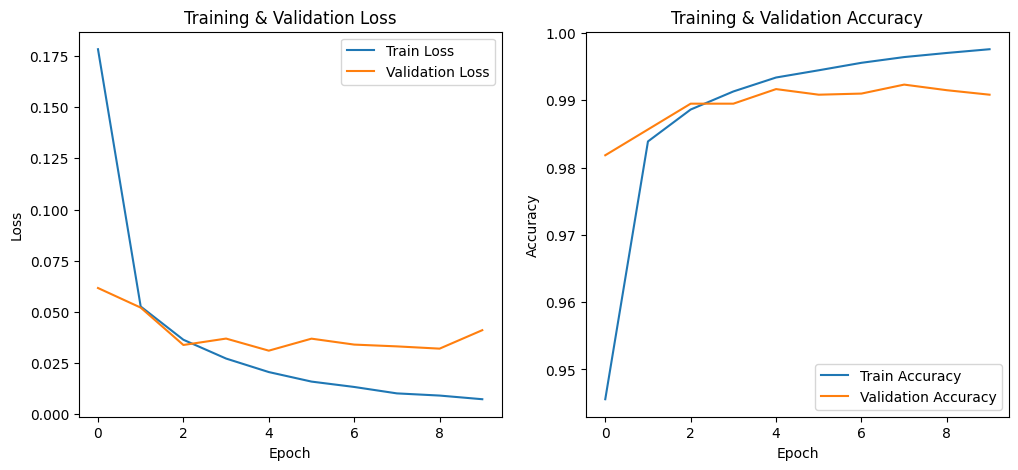

In [7]:
# OPTIONAL: Plot training loss & accuracy

plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

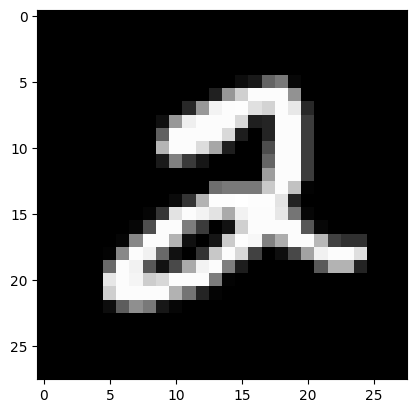

In [8]:
img = x_train[5].reshape(28, 28)
plt.imshow(img, cmap="gray")
plt.show()